In [3]:
!pip install ta

import ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random Forest

## Data Extraction

In [122]:
np.random.seed(1111)

df = pd.read_csv('Database.csv')
df

,Date,Open,High,Low,Close,Volume,Return,Output
0,04/01/2010 16:56:00,5.87,5.92,5.69,5.87,449800,-0.08,0
1,05/01/2010 16:56:00,5.87,6.04,5.77,5.95,817700,-0.47,0
2,06/01/2010 16:56:00,5.98,6.51,5.96,6.42,1077000,0.27,1
3,07/01/2010 16:56:00,6.37,6.37,6.09,6.15,425400,-0.05,0
4,08/01/2010 16:56:00,6.15,6.34,6.04,6.20,366600,-0.04,0
...,...,...,...,...,...,...,...,...
3319,24/08/2023 16:56:00,66.15,66.48,65.40,65.45,6201500,2.52,1
3320,25/08/2023 16:56:00,65.45,65.60,62.69,62.93,5148500,0.15,1
3321,28/08/2023 16:56:00,63.19,63.24,62.04,62.78,4100600,-0.78,0
3322,29/08/2023 16:56:00,63.00,64.20,62.87,63.56,3955100,0.17,1


In [123]:
# df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y %H:%M:%S")
dataDates = pd.to_datetime(df['Date'], errors='coerce')

df["year"] =  dataDates.dt.year
df

,Date,Open,High,Low,Close,Volume,Return,Output,year
0,04/01/2010 16:56:00,5.87,5.92,5.69,5.87,449800,-0.08,0,2010
1,05/01/2010 16:56:00,5.87,6.04,5.77,5.95,817700,-0.47,0,2010
2,06/01/2010 16:56:00,5.98,6.51,5.96,6.42,1077000,0.27,1,2010
3,07/01/2010 16:56:00,6.37,6.37,6.09,6.15,425400,-0.05,0,2010
4,08/01/2010 16:56:00,6.15,6.34,6.04,6.20,366600,-0.04,0,2010
...,...,...,...,...,...,...,...,...,...
3319,24/08/2023 16:56:00,66.15,66.48,65.40,65.45,6201500,2.52,1,2023
3320,25/08/2023 16:56:00,65.45,65.60,62.69,62.93,5148500,0.15,1,2023
3321,28/08/2023 16:56:00,63.19,63.24,62.04,62.78,4100600,-0.78,0,2023
3322,29/08/2023 16:56:00,63.00,64.20,62.87,63.56,3955100,0.17,1,2023


## Feature Engineering

### Time Series Feature



In [124]:
open = df.Open
high = df.High
low = df.Low
close = df.Close
volume = df.Volume

In [125]:
# Close Lag Feature
df['Close_Lag_1'] = close.shift(1)

# Volume difference
df['Volume_diff'] = volume.diff()

# Volume Weighted Average Price
df['vwap'] = (close * volume).cumsum() / volume.cumsum()

# Volume Percentage Change
df['volume_percentage_change'] = volume.pct_change()

# Daily Return
df['daily_Return'] = close.pct_change() * 100

In [126]:
interators = [2, 3, 4, 5, 10]

for interator in interators:

    # Lag Feature
    close_lag_column = f"Close_Lag_{interator}"
    df[close_lag_column] = close.shift(interator)

    # Rolling Avg
    rolling_averages = df.rolling(interator).mean()
    close_rolling_mean_column = f"Close_Rolling_Mean_{interator}"
    df[close_rolling_mean_column] = rolling_averages["Close"]

    # Close Ratio
    close_ratio_column = f"Close_Ratio_{interator}"
    df[close_ratio_column] = close / rolling_averages["Close"]

    # Rolling Standard Deviation
    rolling_std = df.rolling(interator).std()
    close_rolling_std_column = f"Close_Rolling_Std_{interator}"
    df[close_rolling_std_column] = rolling_std["Close"]

    # Expanding Avg
    expanding_averages = df.expanding(interator).mean()
    close_expanding_mean_column = f"Close_Expanding_Mean_{interator}"
    df[close_expanding_mean_column] = expanding_averages["Close"]

    # Expanding Standard Deviation
    expanding_std = df.expanding(interator).std()
    close_expanding_std_column = f"Close_Expanding_Mean_{interator}"
    df[close_expanding_std_column] = expanding_std["Close"]

    # Exponential Moving Avg
    exponential_mov_avg = df.ewm(span=interator, adjust=False).mean()
    exponential_moving_avg_column = f"Exponential_Moving_Avg_{interator}"
    df[exponential_moving_avg_column] = exponential_mov_avg["Close"]

    # Simple Moving Average
    sma = df.rolling(interator).mean()
    sma_mean_column = f"sma_{interator}"
    df[sma_mean_column] = sma["Close"]

<ipython-input-126-c6832f42c335>:10: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_averages = df.rolling(interator).mean()
<ipython-input-126-c6832f42c335>:19: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std = df.rolling(interator).std()
<ipython-input-126-c6832f42c335>:24: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  expanding_averages = df.expanding(interator).mean()
<ipython-input-126-c6832f42c33

In [127]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Volume,Return,Output,year,Close_Lag_1,...,Close_Expanding_Mean_5,Exponential_Moving_Avg_5,sma_5,Close_Lag_10,Close_Rolling_Mean_10,Close_Ratio_10,Close_Rolling_Std_10,Close_Expanding_Mean_10,Exponential_Moving_Avg_10,sma_10
10,18/01/2010 16:56:00,6.56,6.68,6.48,6.61,370300,-0.02,0,2010,6.41,...,0.230391,6.458262,6.472,5.87,6.332,1.043904,0.193437,0.230391,6.338106,6.332
11,19/01/2010 16:56:00,6.59,6.71,6.48,6.63,798300,0.26,1,2010,6.61,...,0.240599,6.515508,6.514,5.95,6.400,1.035937,0.161038,0.240599,6.391178,6.400
12,20/01/2010 16:56:00,6.60,6.65,6.36,6.37,641600,0.24,1,2010,6.63,...,0.230801,6.467005,6.498,6.42,6.395,0.996091,0.161125,0.230801,6.387327,6.395
13,21/01/2010 16:56:00,6.45,6.53,6.06,6.13,684600,0.01,1,2010,6.37,...,0.227625,6.354670,6.430,6.15,6.393,0.958861,0.164590,0.227625,6.340540,6.393
14,22/01/2010 16:56:00,6.06,6.16,5.97,6.12,688000,-0.06,0,2010,6.13,...,0.224684,6.276447,6.372,6.20,6.385,0.958496,0.176525,0.224684,6.300442,6.385


### Technical Indicator Feature

In [128]:
# Moving Average Convergence Divergence (MACD)
df['MACD'] = ta.trend.macd_diff(df['Close'])

# Relative Strength Index (RSI)
df['RSI_5'] = ta.momentum.rsi(df['Close'], window=5)
df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)

# Money Flow Multiplier: [(Close - Low) - (High - Close)] /(High - Low)
money_flow_mult = ((close - low) - (high - close)) /(high - low)
df['money_flow_mult'] = money_flow_mult

# Money Flow Volume: Money Flow Multiplier x Volume for the Period
money_flow_volume = money_flow_mult * volume
df['money_flow_volume'] = money_flow_volume

# ADL(ADI): Previous ADL + Current Period's Money Flow Volume
adi = money_flow_volume.cumsum()
df['adi'] = adi

# Chaikin Money Flow
cmf = money_flow_volume.rolling(20).sum() / volume.rolling(20).sum()
df['chaikin_money_flow'] = cmf

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

df.head()

,Date,Open,High,Low,Close,Volume,Return,Output,year,Close_Lag_1,...,Close_Expanding_Mean_10,Exponential_Moving_Avg_10,sma_10,MACD,RSI_5,RSI_14,money_flow_mult,money_flow_volume,adi,chaikin_money_flow
43,09/03/2010 16:56:00,5.95,6.14,5.87,6.08,583300,0.01,1,2010,5.93,...,0.244513,5.999138,5.987,0.018214,59.721023,51.026089,0.555556,324055.555556,-4.953375e+05,0.064261
44,10/03/2010 16:56:00,6.09,6.15,6.02,6.07,309200,0.10,1,2010,6.08,...,0.241731,6.012022,6.006,0.021761,58.312843,50.656062,-0.230769,-71353.846154,-5.666913e+05,0.108964
45,11/03/2010 16:56:00,5.97,6.05,5.96,5.97,246300,0.05,1,2010,6.07,...,0.239641,6.004381,6.020,0.017001,45.038221,46.986624,-0.777778,-191566.666667,-7.582580e+05,0.096629
46,12/03/2010 16:56:00,5.99,6.01,5.88,5.92,494000,0.05,1,2010,5.97,...,0.238218,5.989039,6.019,0.010437,39.428421,45.222703,-0.384615,-190000.000000,-9.482580e+05,0.061770
47,15/03/2010 16:56:00,5.96,5.99,5.87,5.87,178500,-0.04,0,2010,5.92,...,0.237611,5.967396,5.994,0.003062,34.116617,43.465451,-1.000000,-178500.000000,-1.126758e+06,-0.014307


In [38]:
# Simple Moving Average (SMA)
sma_5 = close.transform(lambda x: x.rolling(window = 5).mean())
df['sma_5'] = sma_5
sma_15 = close.transform(lambda x: x.rolling(window = 15).mean())
df['sma_15'] = sma_15

SMA_ratio = sma_15/sma_5
df['SMA_ratio'] = SMA_ratio

# Simple Moving Average Volume
sma_5_volume = volume.transform(lambda x: x.rolling(window = 5).mean())
df['sma_5_volume'] = sma_5_volume
sma_15_volume = close.transform(lambda x: x.rolling(window = 15).mean())
df['sma_15_volume'] = sma_15_volume

SMA_ratio_volume = sma_15_volume/sma_5_volume
df['SMA_ratio_volume'] = SMA_ratio_volume

# Exponential Moving Average (EMA)
df['EMA_5'] = ta.trend.ema_indicator(df['Close'], window=5)
df['EMA_14'] = ta.trend.ema_indicator(df['Close'], window=14)

In [39]:
# On-Balance Volume (OBV)
df['OBV'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])

# ATR
atr = ta.volatility.average_true_range(high,low,close,window=14)
df['atr'] = atr

# Money Flow Index (MFI)
df['MFI'] = ta.volume.money_flow_index(df['High'], df['Low'], df['Close'], df['Volume'])

# KCPI
kcpi = ta.volatility.keltner_channel_pband(high,low,close)
df['kcpi'] = kcpi

# DCPI
dcpi = ta.volatility.donchian_channel_pband(high,low,close)
df['dcpi'] = dcpi

# BBPI
bbpi = ta.volatility.bollinger_pband(close,window=20)
df['bbpi'] = bbpi

# EOM
eom = ta.volume.ease_of_movement(high,low,volume,1)
df['eom'] = eom

# Bollinger Bands
df['BB_High'] = ta.volatility.bollinger_hband(df['Close'])
df['BB_Low'] = ta.volatility.bollinger_lband(df['Close'])

In [40]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

df.head()

,Date,Open,High,Low,Close,Volume,Return,Output,year,Close_Lag_1,...,EMA_14,OBV,atr,MFI,kcpi,dcpi,bbpi,eom,BB_High,BB_Low
62,07/04/2010 16:56:00,5.62,5.74,5.62,5.65,595200,0.09,1,2010,5.66,...,5.740908,-2388800,0.164929,23.637203,-0.065292,0.136364,0.209466,-0.705645,6.077193,5.536807
63,09/04/2010 16:56:00,5.68,5.68,5.55,5.56,1254100,-0.01,0,2010,5.65,...,5.716787,-3642900,0.162434,21.727440,-0.340554,0.035714,0.074987,-0.673790,6.040992,5.521008
64,12/04/2010 16:56:00,5.58,5.66,5.54,5.57,1091200,-0.11,0,2010,5.56,...,5.697215,-2551700,0.159403,19.847891,-0.218599,0.111111,0.111473,-0.164956,5.995366,5.516634
65,13/04/2010 16:56:00,5.60,5.69,5.59,5.68,339400,-0.30,0,2010,5.57,...,5.694920,-2212300,0.156588,23.482107,0.242479,0.518519,0.360301,1.178550,5.961616,5.521384
66,14/04/2010 16:56:00,5.74,5.99,5.74,5.98,1465700,0.05,1,2010,5.68,...,5.732931,-746600,0.167546,38.101179,1.297001,0.977778,1.009463,3.837757,5.975626,5.513374


## Split Dataset

In [19]:
y_test_aux = df.loc[df['year'] >= 2022, ['Date', 'Output']].reset_index()

y_train = df.loc[df['year'] < 2022, 'Output']
X_train = df.loc[df['year']  < 2022].drop(['Output', 'Return', 'Date'], axis="columns")

y_test = df.loc[df['year']  >= 2022, 'Output']
X_test = df.loc[df['year']  >= 2022].drop(['Output', 'Return', 'Date'], axis="columns")

## Holdout

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Aplica Random Forest Classification para o conjunto de treinamento
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1111)
classifier.fit(X_train, y_train)

# Predição com os o conjunto de teste
y_pred = classifier.predict(X_test)


## Evaluate

In [12]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)

  ConfusionMatrixDisplay(confusion_matrix=cm).plot();

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  AUC = roc_auc_score(y_test, y_pred)

  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("AUC:", AUC)

Accuracy: 0.5227817745803357
Precision: 0.5229007633587787
Recall: 0.6492890995260664
AUC: 0.5212464915106061


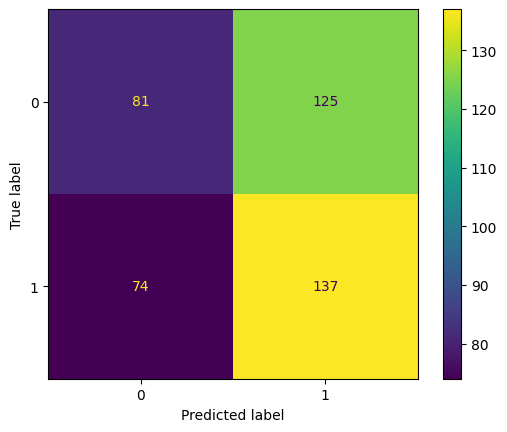

In [21]:
evaluate_classification(y_test, y_pred)

## Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import random

param_dist = {'n_estimators': np.arange(50,1400),
              'max_depth': np.arange(1,100)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=8,
                                 cv=6)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_iter=8,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'n_estimators': array([  50,   51,   52, ..., 1397, 1398, 1399])})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

Best hyperparameters: {'n_estimators': 838, 'max_depth': 1}


Accuracy: 0.5011990407673861
Precision: 0.5205479452054794
Recall: 0.18009478672985782
AUC: 0.5050959370542493


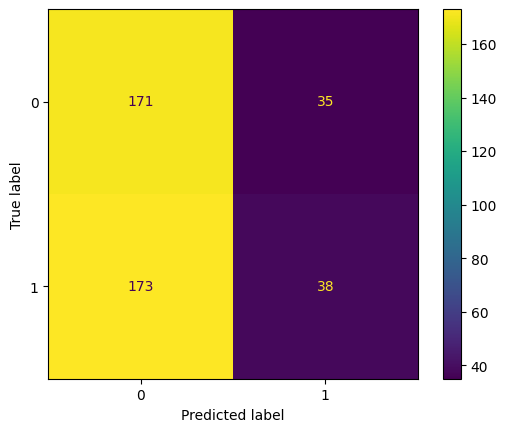

In [ ]:
evaluate_classification(y_test, y_pred)

## Generate Output

In [58]:
def generate_output(y_test, y_pred):

  #testDate = y_test.reset_index()
  #testDate = testDate['Date'].dt.strftime('%Y%m%d')
  #testDate = pd.DataFrame(testDate)
  date = df.loc[df['year'] >= 2022, ['Date', 'Output']].reset_index()
  date = pd.to_datetime(date['Date']).dt.strftime('%Y%m%d')
  date = pd.DataFrame(date)

  pred = pd.DataFrame(y_pred, columns = ['Prediction'])

  output = pd.concat([date, pred], axis=1)
  output.to_csv('output.csv', index=False)

  return output

In [102]:
generate_output(y_test,y_pred)

,Date,Prediction
0,20220301,0
1,20220401,0
2,20220501,0
3,20220601,0
4,20220701,0
...,...,...
412,20230824,0
413,20230825,0
414,20230828,0
415,20230829,1


## Time Series Split

In [139]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

def expanding_window(model, X_train, y_train, window_size):

    predictions = []
    actuals = []
    size = len(df.loc[df['year'] < 2022].index)
    size_max =  len(df)
    i = 0

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)

    idx = np.arange(len(X_train))
    train_starts = range(size, size_max, window_size)

    for train_start in train_starts:

        train_idx = idx[:train_start]
        test_idx = idx[train_start : train_start + window_size]

        #X_train_window, X_test_window = X_train[:train_start], X_train[train_start : train_start + window_size]
        #y_train_window, y_test_window = y_train[:train_start], y_train[train_start : train_start + window_size]

        X_train_window, X_test_window = X_train[:train_start], X_train[train_start : train_start + window_size]
        y_train_window, y_test_window = y_train[:train_start], y_train[train_start : train_start + window_size]

        print(f"Fold: {i}")
        #print(f"Train: index={train_idx.index} - Size: {X_train[:train_start].size}")
        print(f"Test:  index={y_train[train_start : train_start + window_size].index} - Size: {y_train[train_start : train_start + window_size].size} \n")

        model.fit(X_train_window, y_train_window)
        y_pred_window = model.predict(X_test_window)

        i+=1
        predictions.extend(y_pred_window)
        actuals.extend(y_test_window)

    return np.array(predictions), np.array(actuals)


In [103]:
y = df['Output']
X = df.drop(['Output', 'Return', 'Date'], axis="columns")

### Time Series Split (22 Days)

In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1111)
y_pred_window, y_test_window = expanding_window(classifier, X, y, window_size=22)

Fold: 0
Train: index=Int64Index([  76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
            ...
            2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906],
           dtype='int64', length=2769) - Size: 146757
Test:  index=Int64Index([2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917,
            2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928],
           dtype='int64') - Size: 22 

Fold: 1
Train: index=Int64Index([  76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
            ...
            2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928],
           dtype='int64', length=2791) - Size: 147923
Test:  index=Int64Index([2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939,
            2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950],
           dtype='int64') - Size: 22 

Fold: 2
Train: index=Int64Index([  76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
            ...
 

Accuracy: 0.5707434052757794
Precision: 0.5666666666666667
Recall: 0.6445497630331753
AUC: 0.5698476970505683


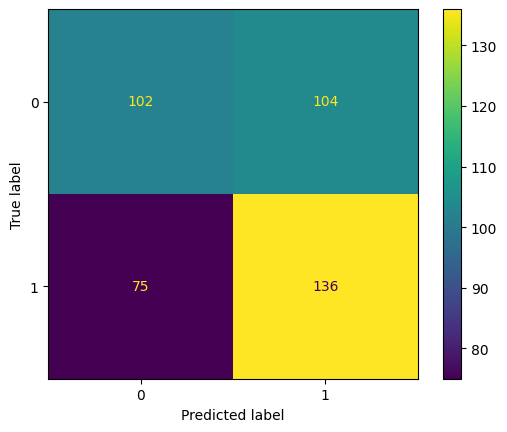

In [61]:
evaluate_classification(y_test_window, y_pred_window)

In [106]:
generate_output(y_test_window, y_pred_window)

,Date,Prediction
0,20220301,0
1,20220401,1
2,20220501,0
3,20220601,1
4,20220701,1
...,...,...
412,20230824,0
413,20230825,0
414,20230828,0
415,20230829,0


### Time Series Split (5 Days)

In [107]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1111)
y_pred_window, y_test_window = expanding_window(classifier, X, y, window_size=5)

Fold: 0
Train: index=Int64Index([  76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
            ...
            2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906],
           dtype='int64', length=2769) - Size: 146757
Test:  index=Int64Index([2907, 2908, 2909, 2910, 2911], dtype='int64') - Size: 5 

Fold: 1
Train: index=Int64Index([  76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
            ...
            2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911],
           dtype='int64', length=2774) - Size: 147022
Test:  index=Int64Index([2912, 2913, 2914, 2915, 2916], dtype='int64') - Size: 5 

Fold: 2
Train: index=Int64Index([  76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
            ...
            2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916],
           dtype='int64', length=2779) - Size: 147287
Test:  index=Int64Index([2917, 2918, 2919, 2920, 2921], dtype='int64') - Size: 5 

Fold: 3
Train: index=Int64Index([  76,   77

Accuracy: 0.5203836930455635
Precision: 0.5228215767634855
Recall: 0.5971563981042654
AUC: 0.5194519854598997


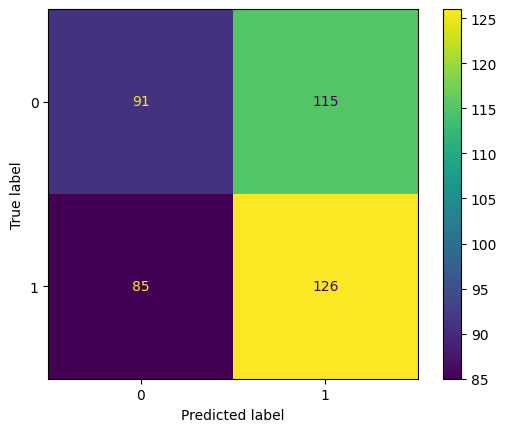

In [108]:
evaluate_classification(y_test_window, y_pred_window)

In [121]:
#generate_output(y_test, y_pred_window)
generate_output(y_test_window, y_pred_window)

,Date,Prediction
0,20220301,0
1,20220401,1
2,20220501,0
3,20220601,1
4,20220701,1
...,...,...
412,20230824,0
413,20230825,0
414,20230828,1
415,20230829,1


### Time Series Split (1 Days)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1111)
y_pred_window, y_test_window = expanding_window(classifier, X, y, window_size=1)

Accuracy: 0.49640287769784175
Precision: 0.5021645021645021
Recall: 0.5497630331753555
AUC: 0.4957553029954447


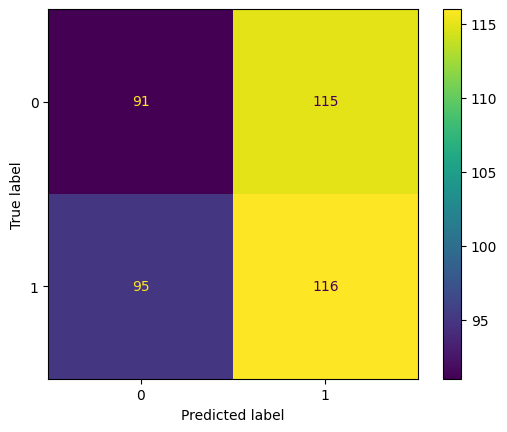

In [111]:
evaluate_classification(y_test_window, y_pred_window)

## Baseline

In [ ]:
y_train = df.loc[df['year'] < 2022, 'Output']
X_train = df.loc[df['year'] < 2022].drop(['Output', 'Return'], axis="columns")

y_test = df.loc[df['year'] >= 2022, 'Output']
X_test = df.loc[df['year'] >= 2022].drop(['Output', 'Return'], axis="columns")

In [ ]:
y_pred_base_classifier = pd.DataFrame(y_test)
y_pred_base_classifier.value_counts()

Output
1         211
0         206
dtype: int64

In [ ]:
y_pred_base_classifier['Output'] = 1
y_pred_base_classifier

,Output
2907,1
2908,1
2909,1
2910,1
2911,1
...,...
3319,1
3320,1
3321,1
3322,1


Accuracy: 0.5059952038369304
Precision: 0.5059952038369304
Recall: 1.0
AUC: 0.5


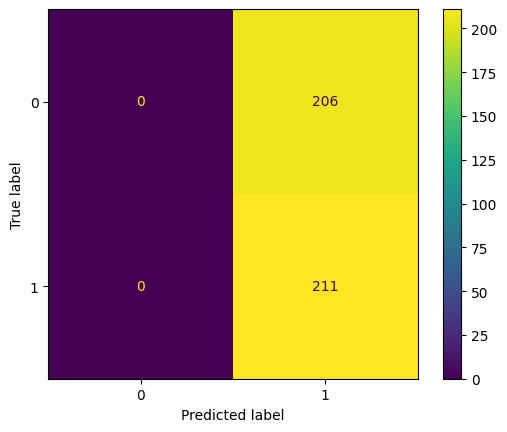

In [ ]:
evaluate_classification(y_test, y_pred_base_classifier)

# MLP

In [80]:
y_test_aux = df.loc[df['year'] >= 2022, ['Date', 'Output']].reset_index()

y_train = df.loc[df['year'] < 2022, 'Return']
X_train = df.loc[df['year']  < 2022].drop(['Output', 'Return', 'Date'], axis="columns")

y_test = df.loc[df['year'] >= 2022, 'Return']
X_test = df.loc[df['year'] >= 2022].drop(['Output', 'Return', 'Date'], axis="columns")

## Holdout

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_regressor(y_test, y_pred):
  test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print('RMSE = ', test_set_rmse)

  mae = mean_absolute_error(y_test, y_pred)
  print("MAE = ", mae)

In [82]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
from sklearn.neural_network import MLPRegressor

# Initializing the MLP Regressor
regressor = MLPRegressor(random_state=1111)

# Fitting MLP Regressor to the Training Set
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)

# Evaluate
evaluate_regressor(y_test, y_pred)

RMSE =  1.3548437627944685
MAE =  1.053642392057289


In [85]:
generate_output(y_test, y_pred)

,Date,Prediction
0,20220301,-0.285059
1,20220401,-0.490296
2,20220501,0.056965
3,20220601,-0.749776
4,20220701,-0.403736
...,...,...
412,20230824,-0.244528
413,20230825,-0.567601
414,20230828,-0.289565
415,20230829,-0.113016


## Time Series Split

In [140]:
y = df['Return']
X = df.drop(['Output', 'Return', 'Date'], axis="columns")

### Time Series Split (22 Days)

In [150]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(1), max_iter=100, random_state=1111)
y_pred_window, y_test_window = expanding_window(regressor, X, y, window_size=22)

Fold: 0
Test:  index=Int64Index([2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917,
            2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 1
Test:  index=Int64Index([2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939,
            2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 2
Test:  index=Int64Index([2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961,
            2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 3
Test:  index=Int64Index([2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983,
            2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 4
Test:  index=Int64Index([2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005,
            3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 5
Test:  index=Int64Index([3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027,
            3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 6
Test:  index=Int64Index([3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049,
            3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 7
Test:  index=Int64Index([3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071,
            3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 8
Test:  index=Int64Index([3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093,
            3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 9
Test:  index=Int64Index([3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115,
            3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 10
Test:  index=Int64Index([3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137,
            3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 11
Test:  index=Int64Index([3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159,
            3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 12
Test:  index=Int64Index([3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181,
            3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 13
Test:  index=Int64Index([3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203,
            3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 14
Test:  index=Int64Index([3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225,
            3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 15
Test:  index=Int64Index([3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247,
            3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 16
Test:  index=Int64Index([3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269,
            3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 17
Test:  index=Int64Index([3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291,
            3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302],
           dtype='int64') - Size: 22 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 18
Test:  index=Int64Index([3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313,
            3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323],
           dtype='int64') - Size: 21 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [152]:
evaluate_regressor(y_test_window, y_pred_window)

RMSE =  1.3324061841494972
MAE =  1.0239407571698989


In [153]:
generate_output(y_test_window, y_pred_window)

,Date,Prediction
0,20220301,-0.362303
1,20220401,-0.196741
2,20220501,-0.382775
3,20220601,-0.196741
4,20220701,-0.394170
...,...,...
412,20230824,-0.174164
413,20230825,-0.174164
414,20230828,-0.174164
415,20230829,-0.174164


### Time Series Split (5 Days)

In [144]:
regressor = MLPRegressor(random_state=1111)
y_pred_window, y_test_window = expanding_window(regressor, X, y, window_size=5)

Fold: 0
Test:  index=Int64Index([2907, 2908, 2909, 2910, 2911], dtype='int64') - Size: 5 

Fold: 1
Test:  index=Int64Index([2912, 2913, 2914, 2915, 2916], dtype='int64') - Size: 5 

Fold: 2
Test:  index=Int64Index([2917, 2918, 2919, 2920, 2921], dtype='int64') - Size: 5 

Fold: 3
Test:  index=Int64Index([2922, 2923, 2924, 2925, 2926], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 4
Test:  index=Int64Index([2927, 2928, 2929, 2930, 2931], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 5
Test:  index=Int64Index([2932, 2933, 2934, 2935, 2936], dtype='int64') - Size: 5 

Fold: 6
Test:  index=Int64Index([2937, 2938, 2939, 2940, 2941], dtype='int64') - Size: 5 

Fold: 7
Test:  index=Int64Index([2942, 2943, 2944, 2945, 2946], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 8
Test:  index=Int64Index([2947, 2948, 2949, 2950, 2951], dtype='int64') - Size: 5 

Fold: 9
Test:  index=Int64Index([2952, 2953, 2954, 2955, 2956], dtype='int64') - Size: 5 

Fold: 10
Test:  index=Int64Index([2957, 2958, 2959, 2960, 2961], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 11
Test:  index=Int64Index([2962, 2963, 2964, 2965, 2966], dtype='int64') - Size: 5 

Fold: 12
Test:  index=Int64Index([2967, 2968, 2969, 2970, 2971], dtype='int64') - Size: 5 

Fold: 13
Test:  index=Int64Index([2972, 2973, 2974, 2975, 2976], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 14
Test:  index=Int64Index([2977, 2978, 2979, 2980, 2981], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 15
Test:  index=Int64Index([2982, 2983, 2984, 2985, 2986], dtype='int64') - Size: 5 

Fold: 16
Test:  index=Int64Index([2987, 2988, 2989, 2990, 2991], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 17
Test:  index=Int64Index([2992, 2993, 2994, 2995, 2996], dtype='int64') - Size: 5 

Fold: 18
Test:  index=Int64Index([2997, 2998, 2999, 3000, 3001], dtype='int64') - Size: 5 

Fold: 19
Test:  index=Int64Index([3002, 3003, 3004, 3005, 3006], dtype='int64') - Size: 5 

Fold: 20
Test:  index=Int64Index([3007, 3008, 3009, 3010, 3011], dtype='int64') - Size: 5 

Fold: 21
Test:  index=Int64Index([3012, 3013, 3014, 3015, 3016], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 22
Test:  index=Int64Index([3017, 3018, 3019, 3020, 3021], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 23
Test:  index=Int64Index([3022, 3023, 3024, 3025, 3026], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 24
Test:  index=Int64Index([3027, 3028, 3029, 3030, 3031], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 25
Test:  index=Int64Index([3032, 3033, 3034, 3035, 3036], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 26
Test:  index=Int64Index([3037, 3038, 3039, 3040, 3041], dtype='int64') - Size: 5 

Fold: 27
Test:  index=Int64Index([3042, 3043, 3044, 3045, 3046], dtype='int64') - Size: 5 

Fold: 28
Test:  index=Int64Index([3047, 3048, 3049, 3050, 3051], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 29
Test:  index=Int64Index([3052, 3053, 3054, 3055, 3056], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 30
Test:  index=Int64Index([3057, 3058, 3059, 3060, 3061], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 31
Test:  index=Int64Index([3062, 3063, 3064, 3065, 3066], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 32
Test:  index=Int64Index([3067, 3068, 3069, 3070, 3071], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 33
Test:  index=Int64Index([3072, 3073, 3074, 3075, 3076], dtype='int64') - Size: 5 

Fold: 34
Test:  index=Int64Index([3077, 3078, 3079, 3080, 3081], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 35
Test:  index=Int64Index([3082, 3083, 3084, 3085, 3086], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 36
Test:  index=Int64Index([3087, 3088, 3089, 3090, 3091], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 37
Test:  index=Int64Index([3092, 3093, 3094, 3095, 3096], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 38
Test:  index=Int64Index([3097, 3098, 3099, 3100, 3101], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 39
Test:  index=Int64Index([3102, 3103, 3104, 3105, 3106], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 40
Test:  index=Int64Index([3107, 3108, 3109, 3110, 3111], dtype='int64') - Size: 5 

Fold: 41
Test:  index=Int64Index([3112, 3113, 3114, 3115, 3116], dtype='int64') - Size: 5 

Fold: 42
Test:  index=Int64Index([3117, 3118, 3119, 3120, 3121], dtype='int64') - Size: 5 

Fold: 43
Test:  index=Int64Index([3122, 3123, 3124, 3125, 3126], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 44
Test:  index=Int64Index([3127, 3128, 3129, 3130, 3131], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 45
Test:  index=Int64Index([3132, 3133, 3134, 3135, 3136], dtype='int64') - Size: 5 

Fold: 46
Test:  index=Int64Index([3137, 3138, 3139, 3140, 3141], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 47
Test:  index=Int64Index([3142, 3143, 3144, 3145, 3146], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 48
Test:  index=Int64Index([3147, 3148, 3149, 3150, 3151], dtype='int64') - Size: 5 

Fold: 49
Test:  index=Int64Index([3152, 3153, 3154, 3155, 3156], dtype='int64') - Size: 5 

Fold: 50
Test:  index=Int64Index([3157, 3158, 3159, 3160, 3161], dtype='int64') - Size: 5 

Fold: 51
Test:  index=Int64Index([3162, 3163, 3164, 3165, 3166], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 52
Test:  index=Int64Index([3167, 3168, 3169, 3170, 3171], dtype='int64') - Size: 5 

Fold: 53
Test:  index=Int64Index([3172, 3173, 3174, 3175, 3176], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 54
Test:  index=Int64Index([3177, 3178, 3179, 3180, 3181], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 55
Test:  index=Int64Index([3182, 3183, 3184, 3185, 3186], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 56
Test:  index=Int64Index([3187, 3188, 3189, 3190, 3191], dtype='int64') - Size: 5 

Fold: 57
Test:  index=Int64Index([3192, 3193, 3194, 3195, 3196], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 58
Test:  index=Int64Index([3197, 3198, 3199, 3200, 3201], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 59
Test:  index=Int64Index([3202, 3203, 3204, 3205, 3206], dtype='int64') - Size: 5 

Fold: 60
Test:  index=Int64Index([3207, 3208, 3209, 3210, 3211], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 61
Test:  index=Int64Index([3212, 3213, 3214, 3215, 3216], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 62
Test:  index=Int64Index([3217, 3218, 3219, 3220, 3221], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 63
Test:  index=Int64Index([3222, 3223, 3224, 3225, 3226], dtype='int64') - Size: 5 

Fold: 64
Test:  index=Int64Index([3227, 3228, 3229, 3230, 3231], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 65
Test:  index=Int64Index([3232, 3233, 3234, 3235, 3236], dtype='int64') - Size: 5 

Fold: 66
Test:  index=Int64Index([3237, 3238, 3239, 3240, 3241], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 67
Test:  index=Int64Index([3242, 3243, 3244, 3245, 3246], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 68
Test:  index=Int64Index([3247, 3248, 3249, 3250, 3251], dtype='int64') - Size: 5 

Fold: 69
Test:  index=Int64Index([3252, 3253, 3254, 3255, 3256], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 70
Test:  index=Int64Index([3257, 3258, 3259, 3260, 3261], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 71
Test:  index=Int64Index([3262, 3263, 3264, 3265, 3266], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 72
Test:  index=Int64Index([3267, 3268, 3269, 3270, 3271], dtype='int64') - Size: 5 

Fold: 73
Test:  index=Int64Index([3272, 3273, 3274, 3275, 3276], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 74
Test:  index=Int64Index([3277, 3278, 3279, 3280, 3281], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 75
Test:  index=Int64Index([3282, 3283, 3284, 3285, 3286], dtype='int64') - Size: 5 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 76
Test:  index=Int64Index([3287, 3288, 3289, 3290, 3291], dtype='int64') - Size: 5 

Fold: 77
Test:  index=Int64Index([3292, 3293, 3294, 3295, 3296], dtype='int64') - Size: 5 

Fold: 78
Test:  index=Int64Index([3297, 3298, 3299, 3300, 3301], dtype='int64') - Size: 5 

Fold: 79
Test:  index=Int64Index([3302, 3303, 3304, 3305, 3306], dtype='int64') - Size: 5 

Fold: 80
Test:  index=Int64Index([3307, 3308, 3309, 3310, 3311], dtype='int64') - Size: 5 

Fold: 81
Test:  index=Int64Index([3312, 3313, 3314, 3315, 3316], dtype='int64') - Size: 5 

Fold: 82
Test:  index=Int64Index([3317, 3318, 3319, 3320, 3321], dtype='int64') - Size: 5 

Fold: 83
Test:  index=Int64Index([3322, 3323], dtype='int64') - Size: 2 



In [145]:
evaluate_regressor(y_test_window, y_pred_window)

RMSE =  1.4794723216829302
MAE =  1.1516520476149823


In [146]:
generate_output(y_test_window, y_pred_window)

,Date,Prediction
0,20220301,-0.269820
1,20220401,0.187273
2,20220501,-0.036275
3,20220601,-0.044110
4,20220701,-0.339065
...,...,...
412,20230824,-0.060709
413,20230825,-0.522799
414,20230828,-0.136674
415,20230829,0.238705


### Time Series Split (1 Days)

In [147]:
regressor = MLPRegressor(random_state=1111)
y_pred_window, y_test_window = expanding_window(regressor, X, y, window_size=1)
evaluate_regressor(y_test_window, y_pred_window)

Fold: 0
Test:  index=Int64Index([2907], dtype='int64') - Size: 1 

Fold: 1
Test:  index=Int64Index([2908], dtype='int64') - Size: 1 

Fold: 2
Test:  index=Int64Index([2909], dtype='int64') - Size: 1 

Fold: 3
Test:  index=Int64Index([2910], dtype='int64') - Size: 1 

Fold: 4
Test:  index=Int64Index([2911], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 5
Test:  index=Int64Index([2912], dtype='int64') - Size: 1 

Fold: 6
Test:  index=Int64Index([2913], dtype='int64') - Size: 1 

Fold: 7
Test:  index=Int64Index([2914], dtype='int64') - Size: 1 

Fold: 8
Test:  index=Int64Index([2915], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 9
Test:  index=Int64Index([2916], dtype='int64') - Size: 1 

Fold: 10
Test:  index=Int64Index([2917], dtype='int64') - Size: 1 

Fold: 11
Test:  index=Int64Index([2918], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 12
Test:  index=Int64Index([2919], dtype='int64') - Size: 1 

Fold: 13
Test:  index=Int64Index([2920], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 14
Test:  index=Int64Index([2921], dtype='int64') - Size: 1 

Fold: 15
Test:  index=Int64Index([2922], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 16
Test:  index=Int64Index([2923], dtype='int64') - Size: 1 

Fold: 17
Test:  index=Int64Index([2924], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 18
Test:  index=Int64Index([2925], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 19
Test:  index=Int64Index([2926], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 20
Test:  index=Int64Index([2927], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 21
Test:  index=Int64Index([2928], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 22
Test:  index=Int64Index([2929], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 23
Test:  index=Int64Index([2930], dtype='int64') - Size: 1 

Fold: 24
Test:  index=Int64Index([2931], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 25
Test:  index=Int64Index([2932], dtype='int64') - Size: 1 

Fold: 26
Test:  index=Int64Index([2933], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 27
Test:  index=Int64Index([2934], dtype='int64') - Size: 1 

Fold: 28
Test:  index=Int64Index([2935], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 29
Test:  index=Int64Index([2936], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 30
Test:  index=Int64Index([2937], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 31
Test:  index=Int64Index([2938], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 32
Test:  index=Int64Index([2939], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 33
Test:  index=Int64Index([2940], dtype='int64') - Size: 1 

Fold: 34
Test:  index=Int64Index([2941], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 35
Test:  index=Int64Index([2942], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 36
Test:  index=Int64Index([2943], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 37
Test:  index=Int64Index([2944], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 38
Test:  index=Int64Index([2945], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 39
Test:  index=Int64Index([2946], dtype='int64') - Size: 1 

Fold: 40
Test:  index=Int64Index([2947], dtype='int64') - Size: 1 

Fold: 41
Test:  index=Int64Index([2948], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 42
Test:  index=Int64Index([2949], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 43
Test:  index=Int64Index([2950], dtype='int64') - Size: 1 

Fold: 44
Test:  index=Int64Index([2951], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 45
Test:  index=Int64Index([2952], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 46
Test:  index=Int64Index([2953], dtype='int64') - Size: 1 

Fold: 47
Test:  index=Int64Index([2954], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 48
Test:  index=Int64Index([2955], dtype='int64') - Size: 1 

Fold: 49
Test:  index=Int64Index([2956], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 50
Test:  index=Int64Index([2957], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 51
Test:  index=Int64Index([2958], dtype='int64') - Size: 1 

Fold: 52
Test:  index=Int64Index([2959], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 53
Test:  index=Int64Index([2960], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 54
Test:  index=Int64Index([2961], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 55
Test:  index=Int64Index([2962], dtype='int64') - Size: 1 

Fold: 56
Test:  index=Int64Index([2963], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 57
Test:  index=Int64Index([2964], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 58
Test:  index=Int64Index([2965], dtype='int64') - Size: 1 

Fold: 59
Test:  index=Int64Index([2966], dtype='int64') - Size: 1 

Fold: 60
Test:  index=Int64Index([2967], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 61
Test:  index=Int64Index([2968], dtype='int64') - Size: 1 

Fold: 62
Test:  index=Int64Index([2969], dtype='int64') - Size: 1 

Fold: 63
Test:  index=Int64Index([2970], dtype='int64') - Size: 1 

Fold: 64
Test:  index=Int64Index([2971], dtype='int64') - Size: 1 

Fold: 65
Test:  index=Int64Index([2972], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 66
Test:  index=Int64Index([2973], dtype='int64') - Size: 1 

Fold: 67
Test:  index=Int64Index([2974], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 68
Test:  index=Int64Index([2975], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 69
Test:  index=Int64Index([2976], dtype='int64') - Size: 1 

Fold: 70
Test:  index=Int64Index([2977], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 71
Test:  index=Int64Index([2978], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 72
Test:  index=Int64Index([2979], dtype='int64') - Size: 1 

Fold: 73
Test:  index=Int64Index([2980], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 74
Test:  index=Int64Index([2981], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 75
Test:  index=Int64Index([2982], dtype='int64') - Size: 1 

Fold: 76
Test:  index=Int64Index([2983], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 77
Test:  index=Int64Index([2984], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 78
Test:  index=Int64Index([2985], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 79
Test:  index=Int64Index([2986], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 80
Test:  index=Int64Index([2987], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 81
Test:  index=Int64Index([2988], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 82
Test:  index=Int64Index([2989], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 83
Test:  index=Int64Index([2990], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 84
Test:  index=Int64Index([2991], dtype='int64') - Size: 1 

Fold: 85
Test:  index=Int64Index([2992], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 86
Test:  index=Int64Index([2993], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 87
Test:  index=Int64Index([2994], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 88
Test:  index=Int64Index([2995], dtype='int64') - Size: 1 

Fold: 89
Test:  index=Int64Index([2996], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 90
Test:  index=Int64Index([2997], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 91
Test:  index=Int64Index([2998], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 92
Test:  index=Int64Index([2999], dtype='int64') - Size: 1 

Fold: 93
Test:  index=Int64Index([3000], dtype='int64') - Size: 1 

Fold: 94
Test:  index=Int64Index([3001], dtype='int64') - Size: 1 

Fold: 95
Test:  index=Int64Index([3002], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 96
Test:  index=Int64Index([3003], dtype='int64') - Size: 1 

Fold: 97
Test:  index=Int64Index([3004], dtype='int64') - Size: 1 

Fold: 98
Test:  index=Int64Index([3005], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 99
Test:  index=Int64Index([3006], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 100
Test:  index=Int64Index([3007], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 101
Test:  index=Int64Index([3008], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 102
Test:  index=Int64Index([3009], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 103
Test:  index=Int64Index([3010], dtype='int64') - Size: 1 

Fold: 104
Test:  index=Int64Index([3011], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 105
Test:  index=Int64Index([3012], dtype='int64') - Size: 1 

Fold: 106
Test:  index=Int64Index([3013], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 107
Test:  index=Int64Index([3014], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 108
Test:  index=Int64Index([3015], dtype='int64') - Size: 1 

Fold: 109
Test:  index=Int64Index([3016], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 110
Test:  index=Int64Index([3017], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 111
Test:  index=Int64Index([3018], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 112
Test:  index=Int64Index([3019], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 113
Test:  index=Int64Index([3020], dtype='int64') - Size: 1 

Fold: 114
Test:  index=Int64Index([3021], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 115
Test:  index=Int64Index([3022], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 116
Test:  index=Int64Index([3023], dtype='int64') - Size: 1 

Fold: 117
Test:  index=Int64Index([3024], dtype='int64') - Size: 1 

Fold: 118
Test:  index=Int64Index([3025], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 119
Test:  index=Int64Index([3026], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 120
Test:  index=Int64Index([3027], dtype='int64') - Size: 1 

Fold: 121
Test:  index=Int64Index([3028], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 122
Test:  index=Int64Index([3029], dtype='int64') - Size: 1 

Fold: 123
Test:  index=Int64Index([3030], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 124
Test:  index=Int64Index([3031], dtype='int64') - Size: 1 

Fold: 125
Test:  index=Int64Index([3032], dtype='int64') - Size: 1 

Fold: 126
Test:  index=Int64Index([3033], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 127
Test:  index=Int64Index([3034], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 128
Test:  index=Int64Index([3035], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 129
Test:  index=Int64Index([3036], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 130
Test:  index=Int64Index([3037], dtype='int64') - Size: 1 

Fold: 131
Test:  index=Int64Index([3038], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 132
Test:  index=Int64Index([3039], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 133
Test:  index=Int64Index([3040], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 134
Test:  index=Int64Index([3041], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 135
Test:  index=Int64Index([3042], dtype='int64') - Size: 1 

Fold: 136
Test:  index=Int64Index([3043], dtype='int64') - Size: 1 

Fold: 137
Test:  index=Int64Index([3044], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 138
Test:  index=Int64Index([3045], dtype='int64') - Size: 1 

Fold: 139
Test:  index=Int64Index([3046], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 140
Test:  index=Int64Index([3047], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 141
Test:  index=Int64Index([3048], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 142
Test:  index=Int64Index([3049], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 143
Test:  index=Int64Index([3050], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 144
Test:  index=Int64Index([3051], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 145
Test:  index=Int64Index([3052], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 146
Test:  index=Int64Index([3053], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 147
Test:  index=Int64Index([3054], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 148
Test:  index=Int64Index([3055], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 149
Test:  index=Int64Index([3056], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 150
Test:  index=Int64Index([3057], dtype='int64') - Size: 1 

Fold: 151
Test:  index=Int64Index([3058], dtype='int64') - Size: 1 

Fold: 152
Test:  index=Int64Index([3059], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 153
Test:  index=Int64Index([3060], dtype='int64') - Size: 1 

Fold: 154
Test:  index=Int64Index([3061], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 155
Test:  index=Int64Index([3062], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 156
Test:  index=Int64Index([3063], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 157
Test:  index=Int64Index([3064], dtype='int64') - Size: 1 

Fold: 158
Test:  index=Int64Index([3065], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 159
Test:  index=Int64Index([3066], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 160
Test:  index=Int64Index([3067], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 161
Test:  index=Int64Index([3068], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 162
Test:  index=Int64Index([3069], dtype='int64') - Size: 1 

Fold: 163
Test:  index=Int64Index([3070], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 164
Test:  index=Int64Index([3071], dtype='int64') - Size: 1 

Fold: 165
Test:  index=Int64Index([3072], dtype='int64') - Size: 1 

Fold: 166
Test:  index=Int64Index([3073], dtype='int64') - Size: 1 

Fold: 167
Test:  index=Int64Index([3074], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 168
Test:  index=Int64Index([3075], dtype='int64') - Size: 1 

Fold: 169
Test:  index=Int64Index([3076], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 170
Test:  index=Int64Index([3077], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 171
Test:  index=Int64Index([3078], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 172
Test:  index=Int64Index([3079], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 173
Test:  index=Int64Index([3080], dtype='int64') - Size: 1 

Fold: 174
Test:  index=Int64Index([3081], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 175
Test:  index=Int64Index([3082], dtype='int64') - Size: 1 

Fold: 176
Test:  index=Int64Index([3083], dtype='int64') - Size: 1 

Fold: 177
Test:  index=Int64Index([3084], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 178
Test:  index=Int64Index([3085], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 179
Test:  index=Int64Index([3086], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 180
Test:  index=Int64Index([3087], dtype='int64') - Size: 1 

Fold: 181
Test:  index=Int64Index([3088], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 182
Test:  index=Int64Index([3089], dtype='int64') - Size: 1 

Fold: 183
Test:  index=Int64Index([3090], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 184
Test:  index=Int64Index([3091], dtype='int64') - Size: 1 

Fold: 185
Test:  index=Int64Index([3092], dtype='int64') - Size: 1 

Fold: 186
Test:  index=Int64Index([3093], dtype='int64') - Size: 1 

Fold: 187
Test:  index=Int64Index([3094], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 188
Test:  index=Int64Index([3095], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 189
Test:  index=Int64Index([3096], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 190
Test:  index=Int64Index([3097], dtype='int64') - Size: 1 

Fold: 191
Test:  index=Int64Index([3098], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 192
Test:  index=Int64Index([3099], dtype='int64') - Size: 1 

Fold: 193
Test:  index=Int64Index([3100], dtype='int64') - Size: 1 

Fold: 194
Test:  index=Int64Index([3101], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 195
Test:  index=Int64Index([3102], dtype='int64') - Size: 1 

Fold: 196
Test:  index=Int64Index([3103], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 197
Test:  index=Int64Index([3104], dtype='int64') - Size: 1 

Fold: 198
Test:  index=Int64Index([3105], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 199
Test:  index=Int64Index([3106], dtype='int64') - Size: 1 

Fold: 200
Test:  index=Int64Index([3107], dtype='int64') - Size: 1 

Fold: 201
Test:  index=Int64Index([3108], dtype='int64') - Size: 1 

Fold: 202
Test:  index=Int64Index([3109], dtype='int64') - Size: 1 

Fold: 203
Test:  index=Int64Index([3110], dtype='int64') - Size: 1 

Fold: 204
Test:  index=Int64Index([3111], dtype='int64') - Size: 1 

Fold: 205
Test:  index=Int64Index([3112], dtype='int64') - Size: 1 

Fold: 206
Test:  index=Int64Index([3113], dtype='int64') - Size: 1 

Fold: 207
Test:  index=Int64Index([3114], dtype='int64') - Size: 1 

Fold: 208
Test:  index=Int64Index([3115], dtype='int64') - Size: 1 

Fold: 209
Test:  index=Int64Index([3116], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 210
Test:  index=Int64Index([3117], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 211
Test:  index=Int64Index([3118], dtype='int64') - Size: 1 

Fold: 212
Test:  index=Int64Index([3119], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 213
Test:  index=Int64Index([3120], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 214
Test:  index=Int64Index([3121], dtype='int64') - Size: 1 

Fold: 215
Test:  index=Int64Index([3122], dtype='int64') - Size: 1 

Fold: 216
Test:  index=Int64Index([3123], dtype='int64') - Size: 1 

Fold: 217
Test:  index=Int64Index([3124], dtype='int64') - Size: 1 

Fold: 218
Test:  index=Int64Index([3125], dtype='int64') - Size: 1 

Fold: 219
Test:  index=Int64Index([3126], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 220
Test:  index=Int64Index([3127], dtype='int64') - Size: 1 

Fold: 221
Test:  index=Int64Index([3128], dtype='int64') - Size: 1 

Fold: 222
Test:  index=Int64Index([3129], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 223
Test:  index=Int64Index([3130], dtype='int64') - Size: 1 

Fold: 224
Test:  index=Int64Index([3131], dtype='int64') - Size: 1 

Fold: 225
Test:  index=Int64Index([3132], dtype='int64') - Size: 1 

Fold: 226
Test:  index=Int64Index([3133], dtype='int64') - Size: 1 

Fold: 227
Test:  index=Int64Index([3134], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 228
Test:  index=Int64Index([3135], dtype='int64') - Size: 1 

Fold: 229
Test:  index=Int64Index([3136], dtype='int64') - Size: 1 

Fold: 230
Test:  index=Int64Index([3137], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 231
Test:  index=Int64Index([3138], dtype='int64') - Size: 1 

Fold: 232
Test:  index=Int64Index([3139], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 233
Test:  index=Int64Index([3140], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 234
Test:  index=Int64Index([3141], dtype='int64') - Size: 1 

Fold: 235
Test:  index=Int64Index([3142], dtype='int64') - Size: 1 

Fold: 236
Test:  index=Int64Index([3143], dtype='int64') - Size: 1 

Fold: 237
Test:  index=Int64Index([3144], dtype='int64') - Size: 1 

Fold: 238
Test:  index=Int64Index([3145], dtype='int64') - Size: 1 

Fold: 239
Test:  index=Int64Index([3146], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 240
Test:  index=Int64Index([3147], dtype='int64') - Size: 1 

Fold: 241
Test:  index=Int64Index([3148], dtype='int64') - Size: 1 

Fold: 242
Test:  index=Int64Index([3149], dtype='int64') - Size: 1 

Fold: 243
Test:  index=Int64Index([3150], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 244
Test:  index=Int64Index([3151], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 245
Test:  index=Int64Index([3152], dtype='int64') - Size: 1 

Fold: 246
Test:  index=Int64Index([3153], dtype='int64') - Size: 1 

Fold: 247
Test:  index=Int64Index([3154], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 248
Test:  index=Int64Index([3155], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 249
Test:  index=Int64Index([3156], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 250
Test:  index=Int64Index([3157], dtype='int64') - Size: 1 

Fold: 251
Test:  index=Int64Index([3158], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 252
Test:  index=Int64Index([3159], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 253
Test:  index=Int64Index([3160], dtype='int64') - Size: 1 

Fold: 254
Test:  index=Int64Index([3161], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 255
Test:  index=Int64Index([3162], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 256
Test:  index=Int64Index([3163], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 257
Test:  index=Int64Index([3164], dtype='int64') - Size: 1 

Fold: 258
Test:  index=Int64Index([3165], dtype='int64') - Size: 1 

Fold: 259
Test:  index=Int64Index([3166], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 260
Test:  index=Int64Index([3167], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 261
Test:  index=Int64Index([3168], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 262
Test:  index=Int64Index([3169], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 263
Test:  index=Int64Index([3170], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 264
Test:  index=Int64Index([3171], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 265
Test:  index=Int64Index([3172], dtype='int64') - Size: 1 

Fold: 266
Test:  index=Int64Index([3173], dtype='int64') - Size: 1 

Fold: 267
Test:  index=Int64Index([3174], dtype='int64') - Size: 1 

Fold: 268
Test:  index=Int64Index([3175], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 269
Test:  index=Int64Index([3176], dtype='int64') - Size: 1 

Fold: 270
Test:  index=Int64Index([3177], dtype='int64') - Size: 1 

Fold: 271
Test:  index=Int64Index([3178], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 272
Test:  index=Int64Index([3179], dtype='int64') - Size: 1 

Fold: 273
Test:  index=Int64Index([3180], dtype='int64') - Size: 1 

Fold: 274
Test:  index=Int64Index([3181], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 275
Test:  index=Int64Index([3182], dtype='int64') - Size: 1 

Fold: 276
Test:  index=Int64Index([3183], dtype='int64') - Size: 1 

Fold: 277
Test:  index=Int64Index([3184], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 278
Test:  index=Int64Index([3185], dtype='int64') - Size: 1 

Fold: 279
Test:  index=Int64Index([3186], dtype='int64') - Size: 1 

Fold: 280
Test:  index=Int64Index([3187], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 281
Test:  index=Int64Index([3188], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 282
Test:  index=Int64Index([3189], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 283
Test:  index=Int64Index([3190], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 284
Test:  index=Int64Index([3191], dtype='int64') - Size: 1 

Fold: 285
Test:  index=Int64Index([3192], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 286
Test:  index=Int64Index([3193], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 287
Test:  index=Int64Index([3194], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 288
Test:  index=Int64Index([3195], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 289
Test:  index=Int64Index([3196], dtype='int64') - Size: 1 

Fold: 290
Test:  index=Int64Index([3197], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 291
Test:  index=Int64Index([3198], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 292
Test:  index=Int64Index([3199], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 293
Test:  index=Int64Index([3200], dtype='int64') - Size: 1 

Fold: 294
Test:  index=Int64Index([3201], dtype='int64') - Size: 1 

Fold: 295
Test:  index=Int64Index([3202], dtype='int64') - Size: 1 

Fold: 296
Test:  index=Int64Index([3203], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 297
Test:  index=Int64Index([3204], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 298
Test:  index=Int64Index([3205], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 299
Test:  index=Int64Index([3206], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 300
Test:  index=Int64Index([3207], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 301
Test:  index=Int64Index([3208], dtype='int64') - Size: 1 

Fold: 302
Test:  index=Int64Index([3209], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 303
Test:  index=Int64Index([3210], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 304
Test:  index=Int64Index([3211], dtype='int64') - Size: 1 

Fold: 305
Test:  index=Int64Index([3212], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 306
Test:  index=Int64Index([3213], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 307
Test:  index=Int64Index([3214], dtype='int64') - Size: 1 

Fold: 308
Test:  index=Int64Index([3215], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 309
Test:  index=Int64Index([3216], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 310
Test:  index=Int64Index([3217], dtype='int64') - Size: 1 

Fold: 311
Test:  index=Int64Index([3218], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 312
Test:  index=Int64Index([3219], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 313
Test:  index=Int64Index([3220], dtype='int64') - Size: 1 

Fold: 314
Test:  index=Int64Index([3221], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 315
Test:  index=Int64Index([3222], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 316
Test:  index=Int64Index([3223], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 317
Test:  index=Int64Index([3224], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 318
Test:  index=Int64Index([3225], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 319
Test:  index=Int64Index([3226], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 320
Test:  index=Int64Index([3227], dtype='int64') - Size: 1 

Fold: 321
Test:  index=Int64Index([3228], dtype='int64') - Size: 1 

Fold: 322
Test:  index=Int64Index([3229], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 323
Test:  index=Int64Index([3230], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 324
Test:  index=Int64Index([3231], dtype='int64') - Size: 1 

Fold: 325
Test:  index=Int64Index([3232], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 326
Test:  index=Int64Index([3233], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 327
Test:  index=Int64Index([3234], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 328
Test:  index=Int64Index([3235], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 329
Test:  index=Int64Index([3236], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 330
Test:  index=Int64Index([3237], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 331
Test:  index=Int64Index([3238], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 332
Test:  index=Int64Index([3239], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 333
Test:  index=Int64Index([3240], dtype='int64') - Size: 1 

Fold: 334
Test:  index=Int64Index([3241], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 335
Test:  index=Int64Index([3242], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 336
Test:  index=Int64Index([3243], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 337
Test:  index=Int64Index([3244], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 338
Test:  index=Int64Index([3245], dtype='int64') - Size: 1 

Fold: 339
Test:  index=Int64Index([3246], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 340
Test:  index=Int64Index([3247], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 341
Test:  index=Int64Index([3248], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 342
Test:  index=Int64Index([3249], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 343
Test:  index=Int64Index([3250], dtype='int64') - Size: 1 

Fold: 344
Test:  index=Int64Index([3251], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 345
Test:  index=Int64Index([3252], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 346
Test:  index=Int64Index([3253], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 347
Test:  index=Int64Index([3254], dtype='int64') - Size: 1 

Fold: 348
Test:  index=Int64Index([3255], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 349
Test:  index=Int64Index([3256], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 350
Test:  index=Int64Index([3257], dtype='int64') - Size: 1 

Fold: 351
Test:  index=Int64Index([3258], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 352
Test:  index=Int64Index([3259], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 353
Test:  index=Int64Index([3260], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 354
Test:  index=Int64Index([3261], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 355
Test:  index=Int64Index([3262], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 356
Test:  index=Int64Index([3263], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 357
Test:  index=Int64Index([3264], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 358
Test:  index=Int64Index([3265], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 359
Test:  index=Int64Index([3266], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 360
Test:  index=Int64Index([3267], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 361
Test:  index=Int64Index([3268], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 362
Test:  index=Int64Index([3269], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 363
Test:  index=Int64Index([3270], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 364
Test:  index=Int64Index([3271], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 365
Test:  index=Int64Index([3272], dtype='int64') - Size: 1 

Fold: 366
Test:  index=Int64Index([3273], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 367
Test:  index=Int64Index([3274], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 368
Test:  index=Int64Index([3275], dtype='int64') - Size: 1 

Fold: 369
Test:  index=Int64Index([3276], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 370
Test:  index=Int64Index([3277], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 371
Test:  index=Int64Index([3278], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 372
Test:  index=Int64Index([3279], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 373
Test:  index=Int64Index([3280], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 374
Test:  index=Int64Index([3281], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 375
Test:  index=Int64Index([3282], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 376
Test:  index=Int64Index([3283], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 377
Test:  index=Int64Index([3284], dtype='int64') - Size: 1 

Fold: 378
Test:  index=Int64Index([3285], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 379
Test:  index=Int64Index([3286], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 380
Test:  index=Int64Index([3287], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 381
Test:  index=Int64Index([3288], dtype='int64') - Size: 1 

Fold: 382
Test:  index=Int64Index([3289], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 383
Test:  index=Int64Index([3290], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 384
Test:  index=Int64Index([3291], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 385
Test:  index=Int64Index([3292], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 386
Test:  index=Int64Index([3293], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 387
Test:  index=Int64Index([3294], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 388
Test:  index=Int64Index([3295], dtype='int64') - Size: 1 

Fold: 389
Test:  index=Int64Index([3296], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 390
Test:  index=Int64Index([3297], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 391
Test:  index=Int64Index([3298], dtype='int64') - Size: 1 

Fold: 392
Test:  index=Int64Index([3299], dtype='int64') - Size: 1 

Fold: 393
Test:  index=Int64Index([3300], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 394
Test:  index=Int64Index([3301], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 395
Test:  index=Int64Index([3302], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 396
Test:  index=Int64Index([3303], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 397
Test:  index=Int64Index([3304], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 398
Test:  index=Int64Index([3305], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 399
Test:  index=Int64Index([3306], dtype='int64') - Size: 1 

Fold: 400
Test:  index=Int64Index([3307], dtype='int64') - Size: 1 

Fold: 401
Test:  index=Int64Index([3308], dtype='int64') - Size: 1 

Fold: 402
Test:  index=Int64Index([3309], dtype='int64') - Size: 1 

Fold: 403
Test:  index=Int64Index([3310], dtype='int64') - Size: 1 

Fold: 404
Test:  index=Int64Index([3311], dtype='int64') - Size: 1 

Fold: 405
Test:  index=Int64Index([3312], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 406
Test:  index=Int64Index([3313], dtype='int64') - Size: 1 

Fold: 407
Test:  index=Int64Index([3314], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 408
Test:  index=Int64Index([3315], dtype='int64') - Size: 1 

Fold: 409
Test:  index=Int64Index([3316], dtype='int64') - Size: 1 

Fold: 410
Test:  index=Int64Index([3317], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 411
Test:  index=Int64Index([3318], dtype='int64') - Size: 1 

Fold: 412
Test:  index=Int64Index([3319], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 413
Test:  index=Int64Index([3320], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 414
Test:  index=Int64Index([3321], dtype='int64') - Size: 1 

Fold: 415
Test:  index=Int64Index([3322], dtype='int64') - Size: 1 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold: 416
Test:  index=Int64Index([3323], dtype='int64') - Size: 1 

RMSE =  1.3246313711992275
MAE =  1.019878099138729


In [148]:
evaluate_regressor(y_test_window, y_pred_window)

RMSE =  1.3246313711992275
MAE =  1.019878099138729


In [149]:
generate_output(y_test_window, y_pred_window)

,Date,Prediction
0,20220301,-0.227614
1,20220401,-0.193570
2,20220501,-0.056624
3,20220601,-0.152913
4,20220701,-0.233585
...,...,...
412,20230824,0.161862
413,20230825,-0.287187
414,20230828,-0.200110
415,20230829,0.228439


## Baseline

In [ ]:
y_test_aux = df.loc[df['year'] >= 2022, ['Date', 'Output']].reset_index()

y_train = df.loc[df['year'] < 2022, 'Output']
X_train = df.loc[df['year']  < 2022].drop(['Output', 'Return', 'Date'], axis="columns")

y_test = df.loc[df['year'] >= 2022, 'Return']
X_test = df.loc[df['year'] >= 2022].drop(['Output', 'Return', 'Date'], axis="columns")

In [ ]:
pd.DataFrame(y_test)

,Return
2907,-0.29
2908,1.47
2909,-0.19
2910,0.42
2911,0.97
...,...
3319,2.52
3320,0.15
3321,-0.78
3322,0.17


In [ ]:
y_pred_base_regressor = pd.DataFrame(y_test).shift(1, fill_value=0)
y_pred_base_regressor

,Return
2907,0.00
2908,-0.29
2909,1.47
2910,-0.19
2911,0.42
...,...
3319,0.87
3320,2.52
3321,0.15
3322,-0.78


In [ ]:
evaluate_regressor(y_test, y_pred_base_regressor)

RMSE =  1.8736469778487927
MAE =  1.4565947242206225
